In [1]:
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/kaggle/input/inr-to-dollar-currency-monthly-01-12-0330-04-24/INRX.csv")

In [3]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-01,45.709000,45.728001,45.296001,45.529999,45.529999,0
1,2004-01-01,45.528999,45.645000,45.001999,45.015999,45.015999,0
2,2004-02-01,45.000000,45.373001,45.000000,45.195999,45.195999,0
3,2004-03-01,45.165001,45.278999,43.294998,43.334000,43.334000,0
4,2004-04-01,43.331001,44.439999,43.275002,44.284000,44.284000,0


In [5]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
data.drop(['Open','High','Low','Close', 'Volume'], axis = 'columns',inplace =True)


In [7]:
data['Adj Close'].head()

0    45.529999
1    45.015999
2    45.195999
3    43.334000
4    44.284000
Name: Adj Close, dtype: float64

In [8]:
data['Date'] = pd.to_datetime(data['Date'])

In [9]:
year_month = []
for i in data['Date']:
    year_month.append(str(i.year) + "_" + str(i.month))

In [10]:
year_month[:5]

['2003_12', '2004_1', '2004_2', '2004_3', '2004_4']

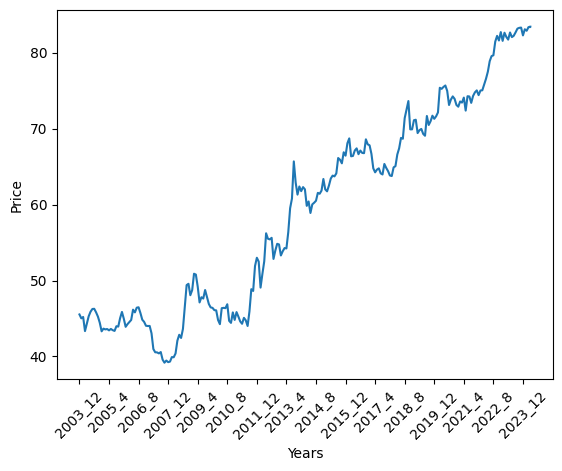

In [11]:
plt.plot(year_month,data['Adj Close'])
# plt.xticks(rotation=90)
plt.xticks(range(0,len(year_month), 16),rotation=45)
plt.ylabel('Price')
plt.xlabel('Years')
plt.show()

In [12]:
data.head()

,Date,Adj Close
0,2003-12-01,45.529999
1,2004-01-01,45.015999
2,2004-02-01,45.195999
3,2004-03-01,43.334000
4,2004-04-01,44.284000


In [13]:
df = data

In [14]:
df.set_index('Date',inplace=True)
df.head()

,Adj Close
Date,
2003-12-01,45.529999
2004-01-01,45.015999
2004-02-01,45.195999
2004-03-01,43.334000
2004-04-01,44.284000


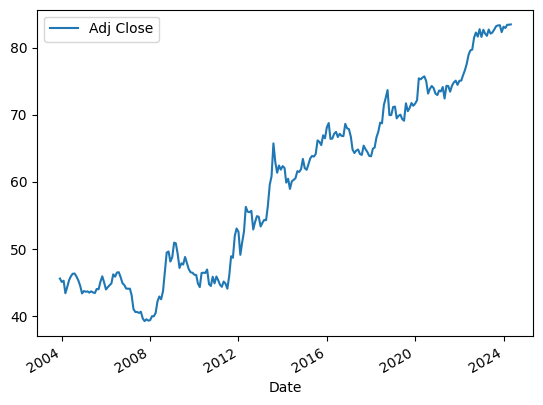

In [15]:
df.plot()
plt.savefig('img.png')

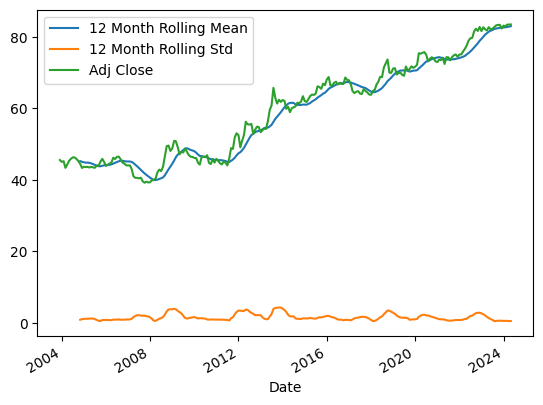

In [16]:
timeseries = df['Adj Close']
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()
plt.legend()

<Figure size 640x480 with 0 Axes>

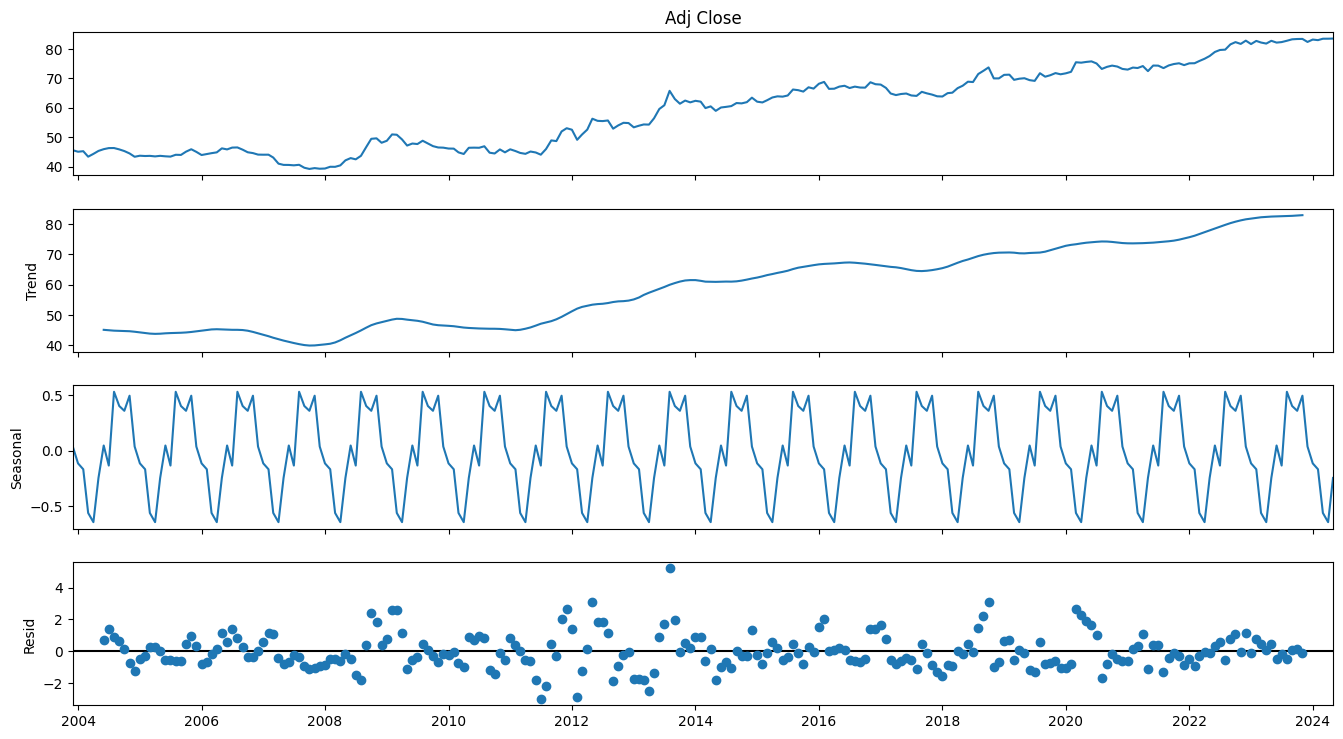

In [17]:

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Adj Close'], period=12)  
figure = plt.figure()  
figure = decomposition.plot()  
figure.set_size_inches(15, 8)

In [18]:
from statsmodels.tsa.stattools import adfuller
test_result = adfuller(df['Adj Close'])
print ('ADF Test:')
labels = ['ADF Statistic','p-value','No. of Lags Used','Number of Observations Used']

for value,label in zip(test_result,labels):
    print (label+': '+str(value))
if test_result [1] <= 0.05:
    print ("Reject null hypothesis and data is stationary")
else:
    print ("Fail to reject H0 thereby data is non-stationary ")

ADF Test:
ADF Statistic: 0.12591144639435048
p-value: 0.9677863055247923
No. of Lags Used: 0
Number of Observations Used: 245
Fail to reject H0 thereby data is non-stationary 


In [19]:
# Store in a function for later use!
def check_adf(time_series):
    test_result = adfuller(time_series)
    print ('ADF Test:')
    labels = ['ADF Statistic','p-value','No. of Lags Used','Number of Observations Used']
    for value,label in zip(test_result,labels):
        print (label+': '+str(value))
    if test_result [1] <= 0.05:
        print ("Reject null hypothesis and data is stationary")
    else:
        print ("fail to reject H0 and data is non-stationary ")

In [20]:
df ['Rate Difference'] = df ['Adj Close'] - df ['Adj Close']. shift (1)
check_adf(df['Rate Difference'].dropna())

ADF Test:
ADF Statistic: -15.138698553227009
p-value: 7.061333478505425e-28
No. of Lags Used: 0
Number of Observations Used: 244
Reject null hypothesis and data is stationary


<Axes: xlabel='Date'>

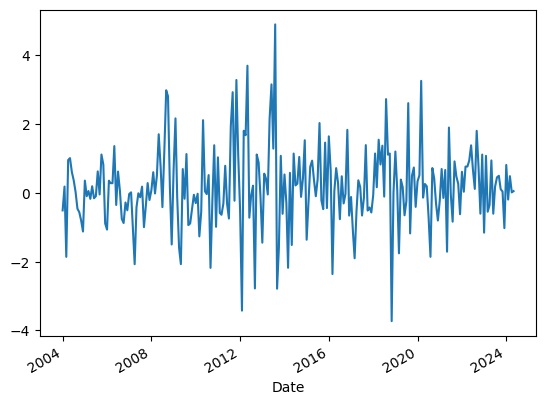

In [21]:
df ['Rate Difference']. plot ()

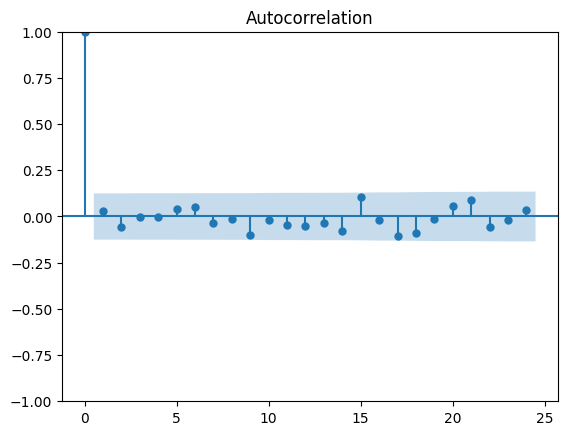

In [22]:
from statsmodels.graphics.tsaplots import plot_acf
fig_first = plot_acf(df["Rate Difference"].dropna())

In [23]:
model = sm.tsa.statespace.SARIMAX(df['Adj Close'],order=(0,1,0), seasonal_order=(1,1,1,12))
ARIMAresult = model.fit()
print (ARIMAresult.summary())

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.58680D+00    |proj g|=  1.47674D-01

At iterate    5    f=  1.54784D+00    |proj g|=  1.52938D-02

At iterate   10    f=  1.54211D+00    |proj g|=  3.45314D-03

At iterate   15    f=  1.54173D+00    |proj g|=  1.37502D-03

At iterate   20    f=  1.54167D+00    |proj g|=  5.77588D-04

At iterate   25    f=  1.54167D+00    |proj g|=  5.18453D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     26     48      1     0     0   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


<Axes: xlabel='Date'>

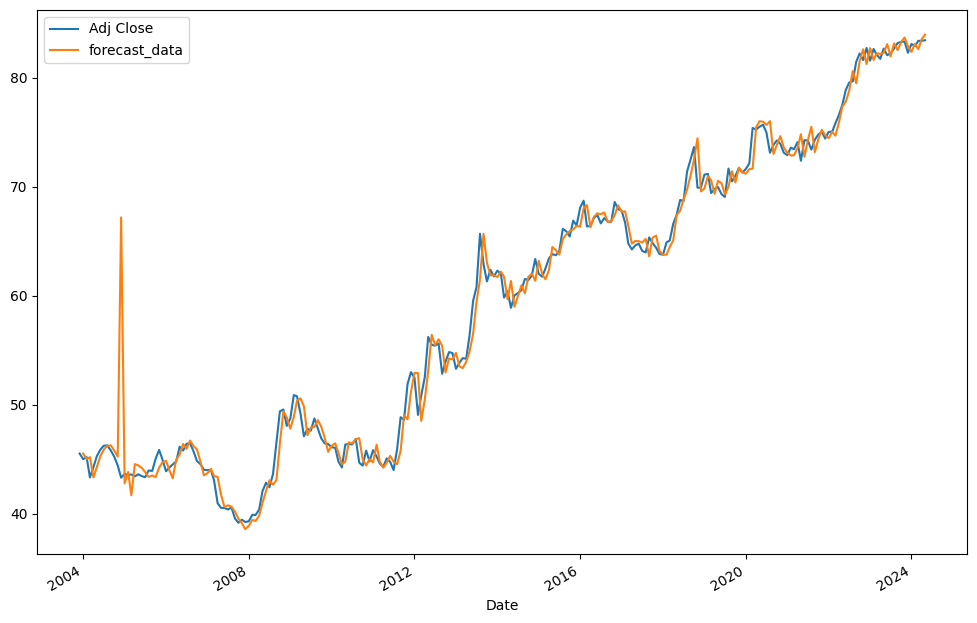

In [24]:
df['forecast_data'] = ARIMAresult.predict(1,information_set='predicted')  
df [['Adj Close','forecast_data']]. plot (figsize= (12,8))

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

data = pd.read_csv("/kaggle/input/inr-to-dollar-currency-monthly-01-12-0330-04-24/INRX.csv")
# Preprocess data
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Extract the column containing the exchange rate data
exchange_rate_data = data['Adj Close']

# Fit SARIMA model
model = SARIMAX(exchange_rate_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # ARIMA(1,1,1)(1,1,1,12)
fit_model = model.fit()

# Forecast future values
forecast_values = fit_model.forecast(steps=24)  # Forecast 24 future values


# Plot predicted values
forecast_index = pd.date_range(start=exchange_rate_data.index[-1], periods=25, freq='ME')[1:]  # Generate dates for forecast
# Create a DataFrame for forecasted values with corresponding dates
forecast_df = pd.DataFrame({'Date': forecast_index, 'Exchange Rate': forecast_values})
forecast_df = pd.DataFrame({'Date': forecast_index, 'Exchange Rate': forecast_values})


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.65082D+00    |proj g|=  2.60176D-01

At iterate    5    f=  1.54684D+00    |proj g|=  5.84052D-02

At iterate   10    f=  1.54112D+00    |proj g|=  4.96116D-03

At iterate   15    f=  1.54057D+00    |proj g|=  3.44188D-03

At iterate   20    f=  1.54048D+00    |proj g|=  7.98165D-05

At iterate   25    f=  1.54048D+00    |proj g|=  1.42900D-03

At iterate   30    f=  1.54047D+00    |proj g|=  5.69764D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


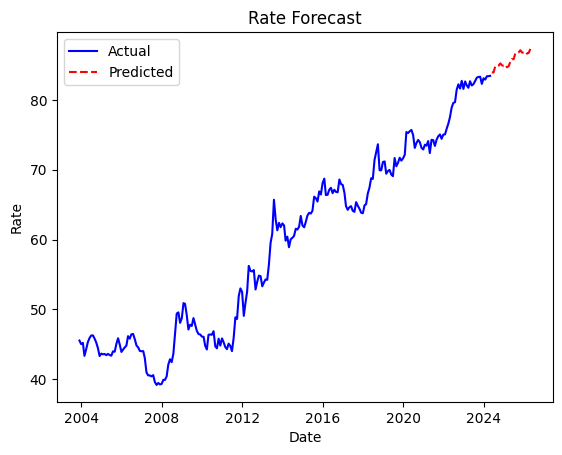

Forecasted Data:
      Date  Exchange Rate
2024-05-31      83.969348
2024-06-30      83.927778
2024-07-31      84.790198
2024-08-31      84.784648
2024-09-30      84.910240
2024-10-31      85.237716
2024-11-30      84.961257
2024-12-31      84.911285
2025-01-31      85.031775
2025-02-28      84.692380
2025-03-31      84.818979
2025-04-30      85.429195
2025-05-31      85.860919
2025-06-30      85.834299
2025-07-31      86.662491
2025-08-31      86.699323
2025-09-30      86.823269
2025-10-31      87.125271
2025-11-30      86.783911
2025-12-31      86.808008
2026-01-31      86.901010
2026-02-28      86.632487
2026-03-31      86.748955
2026-04-30      87.310580


In [56]:
# Plot forecasted values
plt.plot(exchange_rate_data.index, exchange_rate_data, label='Actual', color='blue')

plt.plot(forecast_index, forecast_values, label='Predicted', linestyle='--', color='red')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Rate')
plt.title('Rate Forecast')

plt.legend()

plt.show()

# Print forecasted data with date
print("Forecasted Data:")
print(forecast_df.to_string(index=False))